In [16]:
#database = 'sqlite:////home/rcpaffenroth/data/friday_9-13-19/mydatabase_many_friday.db'
database = 'sqlite:////home/rcpaffenroth/data/good_9-20-19/mydatabase_many_thursday.db'

In [17]:
import dataset
import pickle
import pandas as pa
import numpy as np
import matplotlib.pylab as py
import collections

In [18]:
db = dataset.connect(database)
table = db['runs']
result = table.all()
dfOrig = pa.DataFrame(result)

In [20]:
df = dfOrig[dfOrig['pretrained']=='yes']

In [31]:
colors = ['r','g','b','c','m','y','k','#555555','#dddddd']
colorMap = dict(zip(df['name'].unique(),colors))

In [22]:
colorMap

{'resnet18': 'r',
 'alexnet': 'g',
 'squeezenet1_0': 'b',
 'googlenet': 'c',
 'shufflenet_v2_x1_0': 'm',
 'densenet161': 'y',
 'mobilenet_v2': 'k',
 'resnext50_32x4d': '#eeefff',
 'vgg16': '#ee11bb'}

resnet18
alexnet
resnet18
alexnet
resnet18
alexnet
squeezenet1_0
squeezenet1_0
squeezenet1_0
googlenet
googlenet
googlenet
shufflenet_v2_x1_0
shufflenet_v2_x1_0
densenet161
mobilenet_v2
mobilenet_v2
resnext50_32x4d
vgg16
densenet161
vgg16
vgg16
resnext50_32x4d
resnext50_32x4d
densenet161


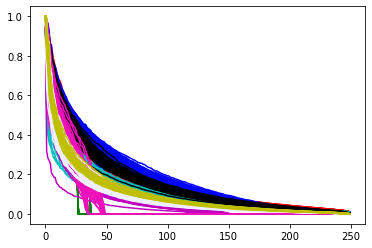

In [23]:
dimensions=collections.defaultdict(list)
normalize=True
for index, row in df.iterrows():
    Js = pickle.loads(row['Js'])
    for J in Js:
        if normalize:
            for i in range(J.shape[0]):
                norm = np.linalg.norm(J[i,:])
                if norm > 0:
                    J[i,:] /= norm 
        U,E,VT = np.linalg.svd(J)
        # if row['name'] in ['alexnet','densenet161','resnext50_32x4d']:
        # if row['name'] in ['densenet161'] and row['seed'] in [1234,1235]:
        if True:
            py.plot((E/E[0]), colorMap[row['name']])
        for i in range(len(E)):
            if E[0] > 0.0 and E[i]/E[0] < 0.1:
                dimensions[row['name']] += [i]
                break

resnet18 114.68 10.92
alexnet 32.666666666666664 20.91
squeezenet1_0 130.17333333333335 19.58
googlenet 81.18666666666667 10.47
shufflenet_v2_x1_0 55.8 11.68
densenet161 74.6 6.2
mobilenet_v2 116.44 9.71
resnext50_32x4d 64.41333333333333 6.3
vgg16 38.56 9.62


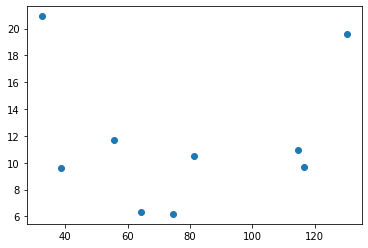

In [24]:
errors = pa.read_csv('errors.csv')
dimVsError = []
for key in dimensions.keys():
    dim = np.mean(dimensions[key])
    error = float(errors[errors['name']==key]['best5'])
    print(key, dim, error)
    dimVsError +=[[dim,error]]
dimVsError = np.array(dimVsError)
py.scatter(dimVsError[:,0], dimVsError[:,1])

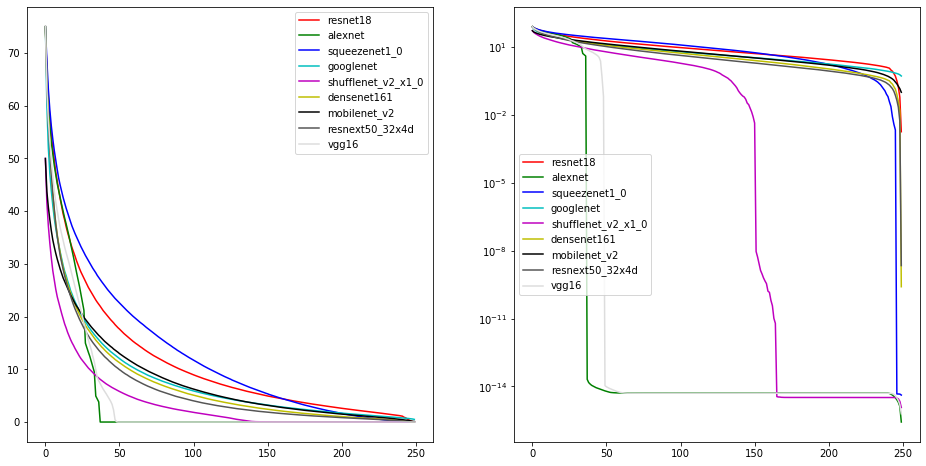

In [32]:
EAverage=collections.defaultdict(lambda : np.zeros(df['numCols'].iloc[0]))
for index, row in df.iterrows():
    Js = pickle.loads(row['Js'])
    for J in Js:
        if normalize:
            for i in range(J.shape[0]):
                norm = np.linalg.norm(J[i,:])
                if norm > 0:
                    J[i,:] /= norm 
        U,E,VT = np.linalg.svd(J)
        EAverage[row['name']] += E/E[0]

_,ax = py.subplots(ncols=2,figsize=[16,8])
for key in EAverage.keys():
    ax[0].plot(EAverage[key],colorMap[key])
    ax[1].semilogy(EAverage[key],colorMap[key])
    
ax[0].legend(EAverage.keys())
ax[1].legend(EAverage.keys())

resnet18 38.2638199874606 30.24
alexnet 15.923152036964904 43.45
squeezenet1_0 43.76040123078507 41.9
googlenet 27.456761845909057 30.22
shufflenet_v2_x1_0 19.6771946337688 30.64
densenet161 25.517040336460692 22.35
mobilenet_v2 39.811804842395944 28.12
resnext50_32x4d 23.228751628747624 22.38
vgg16 15.473803902218556 28.41


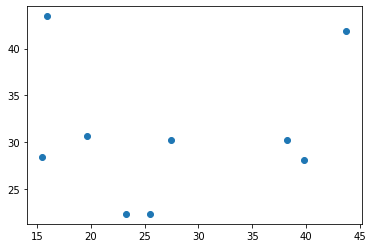

In [26]:
errors = pa.read_csv('errors.csv')
dimVsError = []
for key in EAverage.keys():
    dim = np.sum(EAverage[key]/EAverage[key][0])
    error = float(errors[errors['name']==key]['best1'])
    print(key, dim, error)
    dimVsError +=[[dim,error]]
dimVsError = np.array(dimVsError)
py.scatter(dimVsError[:,0], dimVsError[:,1])